In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], [7.816],
                     [8.9], [5.2], [8.59], [2.1], [8] ,
                     [10], [4.5], [6], [4]],
                    dtype = np.float32)

y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], [3.357],
                     [2.6], [1.96], [3.53], [1.76], [3.2] ,
                     [3.5], [1.6], [2.5], [2.2]],
                    dtype = np.float32)

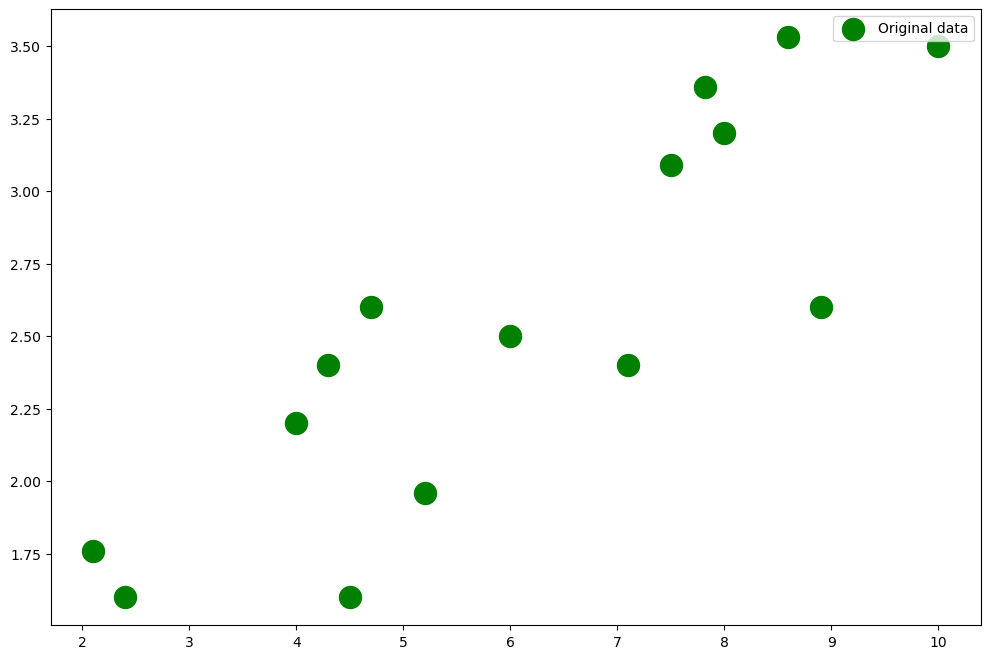

In [3]:
plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label='Original data', s=250, c='g')

plt.legend()
plt.show()

In [4]:
import torch

In [5]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


In [6]:
input_size = 1
hidden_size = 1
output_size = 1

W1 represents the weights that we applied to the input, its input_size by hidden_size.

In [7]:
w1 = torch.rand(input_size,
                hidden_size,
                requires_grad=True)
w1.shape

torch.Size([1, 1])

w2 are the weights that correspond to the connection between the hidden_layer and the final output.

In [8]:
w2 = torch.rand(hidden_size,
                output_size,
                requires_grad=True)
w2.shape

torch.Size([1, 1])

In [9]:
learning_rate = 1e-6

In [28]:
for iter in range(1, 3000):
    y_pred = X_train.mm(w1).mm(w2)
    # mean square error is the standard loss function for linear regression
    loss = (y_pred - Y_train).pow(2).sum()

    if iter % 50 == 0:
        print(iter, loss.item())

    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

50 5.9697980880737305
100 5.765385150909424
150 5.584298610687256
200 5.423707962036133
250 5.281155109405518
300 5.154489040374756
350 5.041834354400635
400 4.941558361053467
450 4.852232933044434
500 4.772600173950195
550 4.701560020446777
600 4.638136386871338
650 4.581486701965332
700 4.530846118927002
750 4.485567092895508
800 4.445047378540039
850 4.408777236938477
900 4.376293659210205
950 4.347189903259277
1000 4.321098327636719
1050 4.297701358795166
1100 4.276711463928223
1150 4.257873058319092
1200 4.240964889526367
1250 4.225778579711914
1300 4.212140083312988
1350 4.199883937835693
1400 4.188869953155518
1450 4.178966522216797
1500 4.170062065124512
1550 4.162052631378174
1600 4.154847621917725
1650 4.148365020751953
1700 4.14253044128418
1750 4.137278079986572
1800 4.132550239562988
1850 4.128293514251709
1900 4.124458312988281
1950 4.121004104614258
2000 4.117894172668457
2050 4.115090370178223
2100 4.112564563751221
2150 4.110288619995117
2200 4.108238220214844
2250 4.1

In [29]:
print('w1: ', w1)
print('w2: ', w2)

w1:  tensor([[0.6771]], requires_grad=True)
w2:  tensor([[0.5894]], requires_grad=True)


In [30]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [31]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.8755],
        [0.9577],
        [2.9928],
        [2.8332],
        [1.7159],
        [3.1189],
        [3.5515],
        [2.0750],
        [3.4278],
        [0.8380],
        [3.1923],
        [3.9904],
        [1.7957],
        [2.3942],
        [1.5962]], grad_fn=<MmBackward0>)

In [32]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.8754936],
       [0.957699 ],
       [2.992809 ],
       [2.8331928],
       [1.7158774],
       [3.1189063],
       [3.551467 ],
       [2.0750144],
       [3.4277642],
       [0.8379865],
       [3.19233  ],
       [3.9904122],
       [1.7956855],
       [2.3942475],
       [1.596165 ]], dtype=float32)

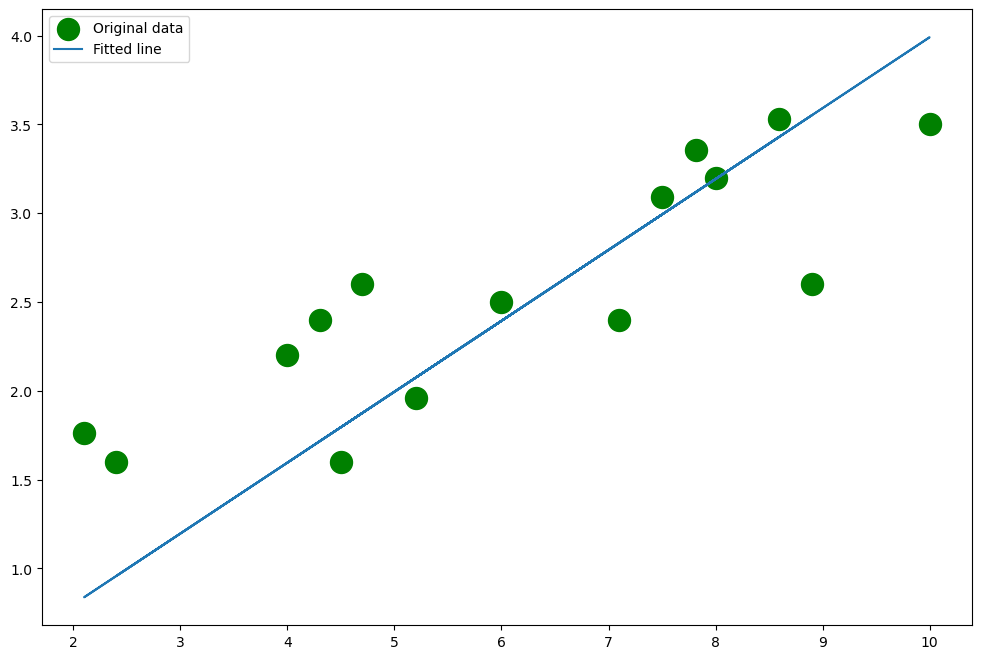

In [33]:
plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, label = 'Original data', s=250, c='g')
plt.plot(x_train, predicted, label = 'Fitted line ')
plt.legend()
plt.show()